# Marketing Analytics Final
### Libo Zhu

In [2]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
#import data and read it as dataframe type
df = pd.read_csv('k mean.csv')

In [34]:
df['intended_use'].describe()

count                          224079
unique                              7
top       access to exclusive content
freq                            89039
Name: intended_use, dtype: object

In [26]:
df_drop=df.dropna()

In [27]:
del df_drop["subid"]
del df_drop['plan_type']
del df_drop['attribution_technical']
del df_drop['attribution_survey']
del df_drop['monthly_price']
del df_drop['num_trial_days']

In [28]:
df_dummy= pd.get_dummies(df_drop)
df_dummy

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,current_sub_TF,payment_period,trial_completed,package_type_base,package_type_economy,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
2,36.001186,25.0,4.5141,False,0.1101,False,0,True,0,0,...,0,0,0,0,1,0,0,1,0,1
3,20.051667,30.0,4.5141,False,0.0367,False,0,True,1,0,...,0,0,0,0,1,0,1,0,1,0
4,22.951579,28.0,4.5141,False,0.0367,True,2,True,1,0,...,0,0,0,0,1,0,1,0,0,1
6,20.051667,61.0,4.5141,False,0.3303,True,1,True,1,0,...,0,0,0,0,0,0,1,0,1,0
7,34.551230,23.0,4.5141,False,0.0000,True,1,True,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,43.0,4.5141,False,0.0000,True,1,True,1,0,...,0,0,0,0,0,0,1,0,0,1
227623,28.751405,38.0,4.5141,False,0.3303,True,1,True,0,0,...,0,0,0,0,0,1,1,0,0,1
227624,27.301448,49.0,4.5141,False,0.3303,True,1,True,0,0,...,0,0,0,0,1,0,1,0,0,1
227625,31.651317,45.0,4.5141,True,0.0367,True,1,True,1,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
df_1=df_dummy[df_dummy["current_sub_TF"]==True]
df_2=df_dummy[df_dummy["current_sub_TF"]==False]

In [30]:
df_n1 = (df_1 - df_1.mean()) / (df_1.std())
df_n2 = (df_2 - df_2.mean()) / (df_2.std())
df_n = (df_dummy - df_dummy.mean()) / (df_dummy.std())
names=df_dummy.columns
names

Index(['weekly_consumption_hour', 'age', 'discount_price',
       'initial_credit_card_declined', 'join_fee', 'current_sub_TF',
       'payment_period', 'trial_completed', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'op_sys_Android', 'op_sys_iOS'],
      dtype='object')

In [22]:
del df_n1["current_sub_TF"]
del df_n2["current_sub_TF"]
df_n1

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,payment_period,trial_completed,package_type_base,package_type_economy,package_type_enhanced,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
4,-1.119481,-0.009270,-0.039189,-0.226872,-0.522276,1.306411,0.084445,0.912906,-0.25609,-0.804671,...,-0.014649,-0.027217,-0.027019,-0.164054,1.812260,-0.476799,0.379744,-0.379744,-0.736117,0.736117
6,-1.711280,-0.005365,-0.039189,-0.226872,1.051278,-0.433517,0.084445,0.912906,-0.25609,-0.804671,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,0.379744,-0.379744,1.358465,-1.358465
7,1.247719,-0.009862,-0.039189,-0.226872,-0.718970,-0.433517,0.084445,0.912906,-0.25609,-0.804671,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,0.379744,-0.379744,-0.736117,0.736117
8,-0.527681,-0.003945,-0.039189,-0.226872,2.821527,-0.433517,0.084445,0.912906,-0.25609,-0.804671,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,0.379744,-0.379744,-0.736117,0.736117
11,1.839518,-0.009743,-0.039189,-0.226872,1.051278,-0.433517,0.084445,-1.095392,-0.25609,1.242731,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,-2.633322,2.633322,-0.736117,0.736117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,0.064119,-0.005365,-0.039189,-0.226872,1.051278,-0.433517,0.084445,-1.095392,-0.25609,1.242731,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,0.379744,-0.379744,1.358465,-1.358465
227622,-0.823581,-0.007495,-0.039189,-0.226872,-0.718970,-0.433517,0.084445,0.912906,-0.25609,-0.804671,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,-0.476799,0.379744,-0.379744,-0.736117,0.736117
227623,0.064119,-0.008087,-0.039189,-0.226872,1.051278,-0.433517,0.084445,-1.095392,-0.25609,1.242731,...,-0.014649,-0.027217,-0.027019,-0.164054,-0.551791,2.097297,0.379744,-0.379744,-0.736117,0.736117
227624,-0.231781,-0.006785,-0.039189,-0.226872,1.051278,-0.433517,0.084445,-1.095392,-0.25609,1.242731,...,-0.014649,-0.027217,-0.027019,-0.164054,1.812260,-0.476799,0.379744,-0.379744,-0.736117,0.736117


In [31]:
name1=df_n1.columns
name1

Index(['weekly_consumption_hour', 'age', 'discount_price',
       'initial_credit_card_declined', 'join_fee', 'current_sub_TF',
       'payment_period', 'trial_completed', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True', 'op_sys_Android', 'op_sys_iOS'],
      dtype='object')

### K-Means

In [9]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,11)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-',color="r")
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

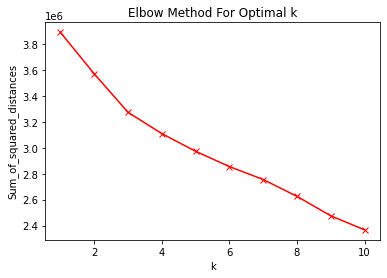

In [73]:
fitting(df_n)

In [70]:
kmean1=KMeans(n_clusters=3).fit(df_n1)
x = pd.DataFrame(kmean1.cluster_centers_,columns=name1)
x.head()

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,payment_period,trial_completed,package_type_base,package_type_economy,package_type_enhanced,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,-0.227382,-0.002304,0.004807,-0.011019,0.006290,0.022770,0.009339,0.912906,-0.256090,-0.804671,...,0.002063,-0.000217,0.006772,0.005880,-0.099171,-0.006933,0.379744,-0.379744,0.034803,-0.034803
1,1.522111,-0.006743,-0.024223,-0.022781,0.164307,-0.191379,-0.076764,-0.087572,0.048471,0.065427,...,-0.008845,-0.024091,-0.020722,-0.085829,0.009729,-0.040890,-2.629479,2.629479,0.019414,-0.019414
2,-0.210513,0.005008,0.001887,0.020902,-0.060676,0.033631,0.013236,-1.095392,0.299580,0.969311,...,0.000310,0.008029,-0.001659,0.020414,0.118925,0.021707,0.379744,-0.379744,-0.049090,0.049090


In [71]:
kmean2=KMeans(n_clusters=3).fit(df_n2)
y = pd.DataFrame(kmean2.cluster_centers_,columns=name1)
y.head()

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,payment_period,trial_completed,package_type_base,package_type_economy,package_type_enhanced,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,1.459176,0.017207,-0.043074,-0.007710,0.214435,-0.100883,0.014505,-0.088222,0.061604,0.047615,...,-0.017921,-0.032112,-0.024530,-0.077143,-0.061765,0.011206,-2.365828,2.365828,0.024447,-0.024447
1,-0.273026,-0.006153,0.002609,0.051513,-0.048616,0.025353,-0.000682,0.034851,0.041531,-0.073451,...,0.016076,0.014308,0.020934,0.032032,-0.035512,0.017831,0.422114,-0.422114,1.357739,-1.357739
2,-0.253761,-0.001416,0.010420,-0.025572,-0.032727,0.014063,-0.003615,0.005482,-0.039233,0.026411,...,-0.003722,0.001124,-0.004519,0.003957,0.036041,-0.012660,0.422483,-0.422483,-0.736504,0.736504


In [32]:
kmean=KMeans(n_clusters=3).fit(df_n)
z = pd.DataFrame(kmean.cluster_centers_,columns=names)
z.head()

,weekly_consumption_hour,age,discount_price,initial_credit_card_declined,join_fee,current_sub_TF,payment_period,trial_completed,package_type_base,package_type_economy,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,1.479892,0.010635,-0.031986,-0.018455,0.184200,-0.089364,-0.172372,-0.042313,-0.085266,0.068318,...,-0.012622,-0.027133,-0.021580,-0.077840,0.014366,-0.035802,-2.528522,2.528522,0.021547,-0.021547
1,-0.393639,0.001065,0.016637,-0.024083,-0.015241,-1.238098,-1.004305,-0.586023,0.064604,0.203798,...,0.014792,0.015656,0.018422,0.079067,0.576502,-0.205790,0.394825,-0.394825,-0.004258,0.004258
2,-0.140107,-0.003190,-0.001529,0.018000,-0.036362,0.715864,0.605036,0.338840,-0.015430,-0.130904,...,-0.005215,-0.002162,-0.005066,-0.025348,-0.326689,0.124094,0.395086,-0.395086,-0.002866,0.002866
